#  Peru Minimum Temperature (Tmin) Raster Analysis + Public Policy + Streamlit
Objetivo. Utilizar un GeoTIFF de temperatura mínima (Tmin) para extraer estadísticas zonales (por departamento/provincia/distrito), analizar riesgos climáticos (heladas/ola de frío) y proponer políticas públicas basadas en evidencia. Entregar al final una aplicación pública en Streamlit.

Repositorio de plantillas. Para la configuración del entorno y la reproducibilidad, por favor use el mismo modelo y configuración proporcionados en este repositorio: 
👉 Rodrigo Grijalba – Clase de Panel de Python

Nombre del repositorio: Minimum-Temperature-Raster
Estructura
Descripción de datos → Fuentes, contexto, etc.

Análisis de datos ráster → Gráficos de estadísticas zonales.

Propuestas de política pública → Generación de información para mitigar el impacto del friaje (olas de frío).

Dataset (Raster)
Raster principal para la asignación-carpeta de Google Drive 
Si el raster tiene varias bandas (meses/años), itere sobre las bandas. Puede asumir que la Banda 1 = año 2020 y así sucesivamente.

# Recommended Workflow

1. Cargue las formas de los límites y asegúrese de que los campos nombre/UBIGEO estén en mayúsculas y sin acentos. 

2. Cargue el GeoTIFF de Tmin. Si es multibanda (meses/años), itere sobre las bandas (suponga Banda 1 = 2020, etc.).

In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [2]:
!pip install --upgrade pip
!pip install --force-reinstall geopandas rasterio rioxarray rasterstats shapely pyproj matplotlib pandas numpy folium

  Using cached geopandas-1.1.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached rasterio-1.4.3-cp311-cp311-win_amd64.whl.metadata (9.4 kB)
  Using cached rioxarray-0.19.0-py3-none-any.whl.metadata (5.5 kB)
  Using cached rasterstats-0.20.0-py3-none-any.whl.metadata (4.2 kB)
  Using cached shapely-2.1.2-cp311-cp311-win_amd64.whl.metadata (7.1 kB)
  Using cached pyproj-3.7.2-cp311-cp311-win_amd64.whl.metadata (31 kB)
  Using cached folium-0.20.0-py2.py3-none-any.whl.metadata (4.2 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached affine-2.4.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached attrs-25.4.0-py3-none-any.whl.metadata (10 kB)
  Using cached click-8.3.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached cligj-0.7.2-py3-none-any.whl.metadata (5.0 kB)
  Using cached click_plugins-1.1.1.2-py2.py3-none-any.whl.metadata (6.5 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
  Using cached xarray-2025.10.1-py3-none-any.whl.metadat

In [2]:
import geopandas as gpd
import rioxarray
import rasterio
from rasterstats import zonal_stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import folium

In [ ]:
pip install chardet

  Using cached chardet-5.2.0-py3-none-any.whl.metadata (3.4 kB)
Using cached chardet-5.2.0-py3-none-any.whl (199 kB)
Note: you may need to restart the kernel to use updated packages.


In [13]:
import chardet

# Recommended Workflow

1. Cargue las formas de los límites y asegúrese de que los campos nombre/UBIGEO estén en mayúsculas y sin acentos. 

2. Cargue el GeoTIFF de Tmin. Si es multibanda (meses/años), itere sobre las bandas (suponga Banda 1 = 2020, etc.).

In [14]:
maps = open(r'_data/shape_file/DISTRITOS.shp', 'rb').read()  
det = chardet.detect(maps)
charenc = det['encoding']
charenc

In [15]:
maps = gpd.read_file(r'_data/shape_file/DISTRITOS.shp')
maps.head(50)

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,geometry
0,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,"POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975..."
1,10,HUANUCO,1009,PUERTO INCA,100904,TOURNAVISTA,TOURNAVISTA,0001,1,INEI,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,25,UCAYALI,2503,PADRE ABAD,250305,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,0001,1,INEI,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,25,UCAYALI,2503,PADRE ABAD,250302,IRAZOLA,SAN ALEJANDRO,0001,1,INEI,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,25,UCAYALI,2503,PADRE ABAD,250304,NESHUYA,MONTE ALEGRE,0001,1,INEI,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."
5,25,UCAYALI,2503,PADRE ABAD,250301,PADRE ABAD,AGUAYTIA,0001,1,INEI,"POLYGON ((-75.67827 -8.4383, -75.67668 -8.4399..."
6,25,UCAYALI,2503,PADRE ABAD,250303,CURIMANA,CURIMANA,0001,1,INEI,"POLYGON ((-75.43663 -8.22999, -75.43651 -8.230..."
7,10,HUANUCO,1009,PUERTO INCA,100901,PUERTO INCA,PUERTO INCA,0001,1,INEI,"POLYGON ((-74.81539 -9.03421, -74.81461 -9.035..."
8,25,UCAYALI,2501,CORONEL PORTILLO,250106,NUEVA REQUENA,NUEVA REQUENA,0001,1,INEI,"POLYGON ((-75.01596 -7.96521, -75.00553 -7.970..."
9,25,UCAYALI,2501,CORONEL PORTILLO,250102,CAMPOVERDE,CAMPO VERDE,0001,1,INEI,"POLYGON ((-74.77971 -8.25514, -74.77953 -8.255..."


<Axes: >

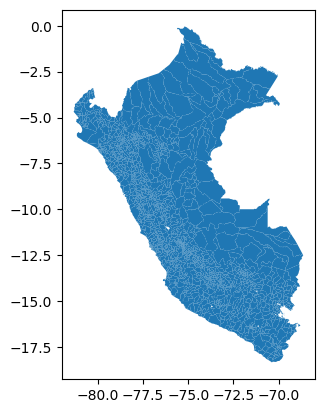

In [5]:
maps.plot()

In [17]:
pip install rasterio matplotlib


Note: you may need to restart the kernel to use updated packages.


In [19]:
import os

# Mostrar la ruta del directorio de trabajo actual
ruta_actual = os.getcwd()
print("Directorio de trabajo actual:", ruta_actual)


Directorio de trabajo actual: c:\Users\MILAGROS\Documents\GitHub\PythonQlab


Directorio actual: C:\Users\MILAGROS\Documents\GitHub\PythonQlab


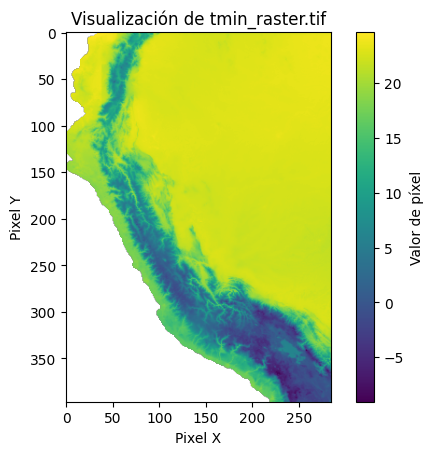

In [20]:
import os
import rasterio
import matplotlib.pyplot as plt

# Establecer el directorio de trabajo (opcional)
os.chdir("C:/Users/MILAGROS/Documents/GitHub/PythonQlab")

# Verificar la ruta actual
print("Directorio actual:", os.getcwd())

# Ruta al archivo TIFF
tif_path = "tmin_raster.tif"

# Abrir y visualizar el archivo .tif
with rasterio.open(tif_path) as src:
    data = src.read(1)  # Leer la primera banda
    plt.imshow(data, cmap='viridis')
    plt.colorbar(label='Valor de píxel')
    plt.title('Visualización de tmin_raster.tif')
    plt.xlabel('Pixel X')
    plt.ylabel('Pixel Y')
    plt.show()
